# Fourth Order Runge Kutta Integrator

The Fourth Order Runge Kutta (RK4) method is a numerical technique used to solve ordinary differential equations (ODEs). It provides a powerful and accurate way to approximate the solutions of ODEs. The RK4 method is widely used due to its balance between simplicity and accuracy. Here is a step-by-step explanation of the RK4 method:

1. **Initial Setup**:
    - Given an initial value problem of the form:
      $[
      \frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
      ]$
    - We want to find the value of $( y )$ at $( t = t_0 + h )$, where $( h )$ is the step size.

2. **Compute the Slopes**:
    - Calculate four intermediate slopes (k1, k2, k3, k4) using the following formulas:
      $[
      k_1 = h \cdot f(t_n, y_n)
      ]$
      $[
      k_2 = h \cdot f\left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2}\right)
      ]$
      $[
      k_3 = h \cdot f\left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2}\right)
      ]$
      $[
      k_4 = h \cdot f(t_n + h, y_n + k_3)
      ]$

3. **Update the Solution**:
    - Combine the slopes to get the next value of $( y )$:
      $[
      y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
      ]$

4. **Iterate**:
    - Repeat the above steps for each time step to approximate the solution over the desired interval.

The RK4 method uses a weighted average of slopes to estimate the next value of the solution. This approach provides a good balance between computational efficiency and accuracy, making it one of the most popular methods for solving ODEs numerically.

## Lorenz 1963 Order of Differential Equation

 * This function/model implements the Lorenz 1963 system of differential equations.
 * 
 * The Lorenz 1963 system is a set of three coupled, first-order, nonlinear differential equations
 * originally developed by Edward Lorenz in 1963. It is a simplified mathematical model for atmospheric convection.
 * 
 * The equations are:
 * 
 * $dx/dt = σ * (y - x)$
 * $dy/dt = x * (ρ - z) - y$
 * $dz/dt = x * y - β * z$
 * 
 * where:
 * - x, y, and z make up the system state.
 * - t represents time.
 * - σ (sigma) is the Prandtl number.
 * - ρ (rho) is the Rayleigh number.
 * - β (beta) is a geometric factor.
 * 
 * The Lorenz system is notable for its chaotic solutions for certain parameter values and initial conditions.
 * It is often used as an example of how deterministic systems can exhibit unpredictable behavior.
 * 
 * Parameters:
 * - sigma (σ): A positive real number, typically around 10.
 * - rho (ρ): A positive real number, typically around 28.
 * - beta (β): A positive real number, typically around 8/3.
 * - initial_state: A tuple or list of three floats representing the initial values of x, y, and z.
 * - t: A float representing the time variable.
 * 
 * Returns:
 * - A tuple of three floats representing the derivatives (dx/dt, dy/dt, dz/dt) at time t.
 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
# Lorenz Chaos Theory Parameters
sigma = 10
beta = 8/3
rho = 28

In [5]:
def rk4singlestep(fun, dt, t0, y0):
    """
    This function does a single 4th-order Runge-Kutta step for ODE integration, where fun is the ODE, dt is the timestep, t0 is the current time, and y0 is the current initial condition. 
    """
    f1 = fun(t0, y0)#first slope of the RK4 method
    f2 = fun(t0 + dt/2, y0 + (dt/2) * f1)
    f3 = fun(t0 + dt/2, y0 + (dt/2)*f2)
    f4 = fun(t0 + dt, y0 +dt*f3)
    yout = y0 + (dt/6)*(f1 + 2*f2 + 2*f3 + f4)
    return yout
    
    

In [6]:
def lorenz(t, y):
    """
        This function defines the dynamical equations
        that represent the Lorenz system. 
        
        Normally we would need to pass the values of
        sigma, beta, and rho, but we have already defined them
        globally above.
    """
    
    # y is a three dimensional state vector
    dy = [sigma * (y[1] - y[0])],
    [y[0] * (rho - y[2]) - y[1]],
    [y[0] * y[1] - beta * y[2]]
    return np.array(dy).flatten()

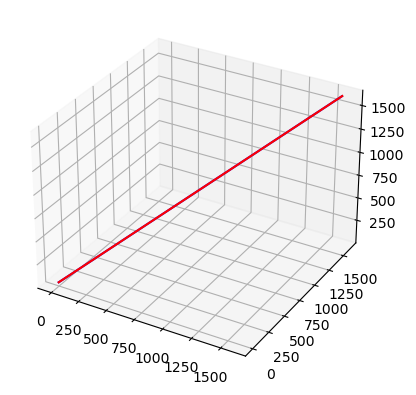

In [7]:
# Initial condition
y0 = [-8, 8, 27]

# Compute trajectory
dt = 0.01
T = 10
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

Y = np.zeros((3, num_time_pts))
Y[:, 0] = y0
yin = y0
for i in range(num_time_pts - 1):
    yout = rk4singlestep(lorenz, dt, t[i], yin)
    Y[:, i + 1] = yout
    yin = yout

ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
ax.plot(Y[0, :], Y[1, :], Y[2, :], 'b')
lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
t = lorenz_solution.t
y = lorenz_solution.y.T
ax.plot(y[:, 0], y[:, 1], y[:, 2], 'r')
plt.show()